In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_parquet('c:/fomo_data2/complete_for_models.parquet')
df = df.fillna(df.median())

In [14]:
X = df.drop('ridership', axis=1)
y = df['ridership']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Initialize the models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
#rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
#rf_model.fit(X_train_scaled, y_train)

# Make predictions
lr_preds = lr_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
#rf_preds = rf_model.predict(X_test_scaled)

In [16]:
# Evaluate Linear Regression
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

# Evaluate Decision Tree Regressor
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_mse = mean_squared_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

# Evaluate Random Forest Regressor
'''rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)'''

# Collect the results in a DataFrame for easy comparison
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree'],
    'MAE': [lr_mae, dt_mae],
    'MSE': [lr_mse, dt_mse],
    'R²': [lr_r2, dt_r2]
})
print(results)

               Model          MAE           MSE        R²
0  Linear Regression  1205.593436  6.444056e+06  0.054262
1      Decision Tree   315.417099  1.391242e+06  0.795820


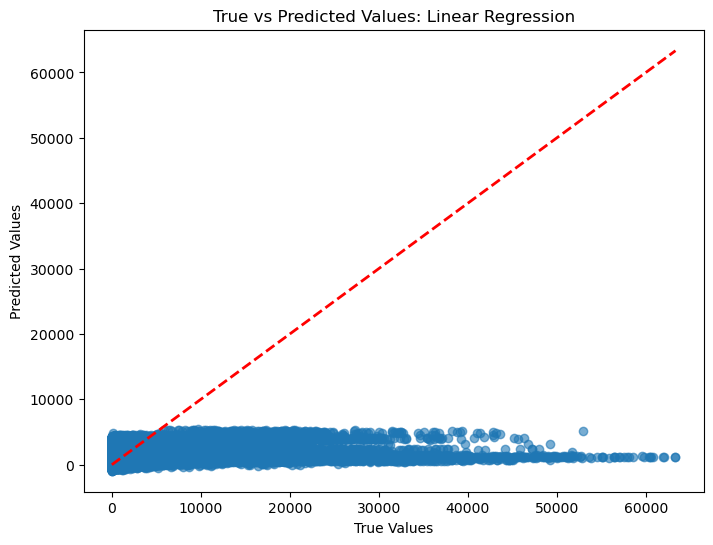

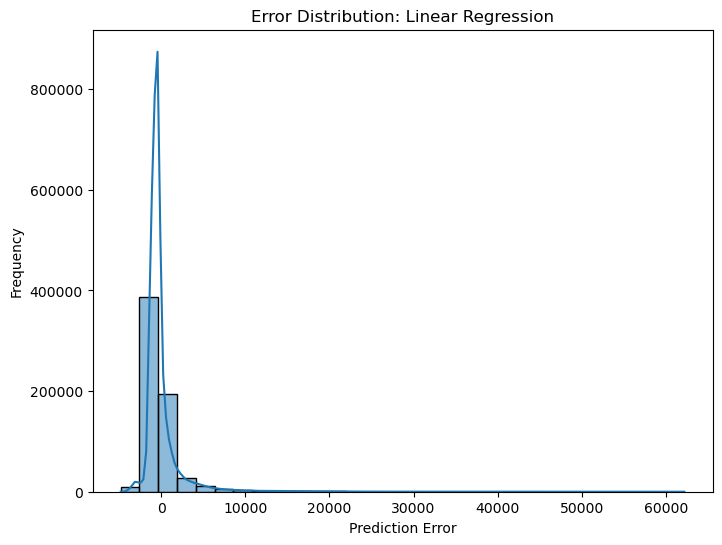

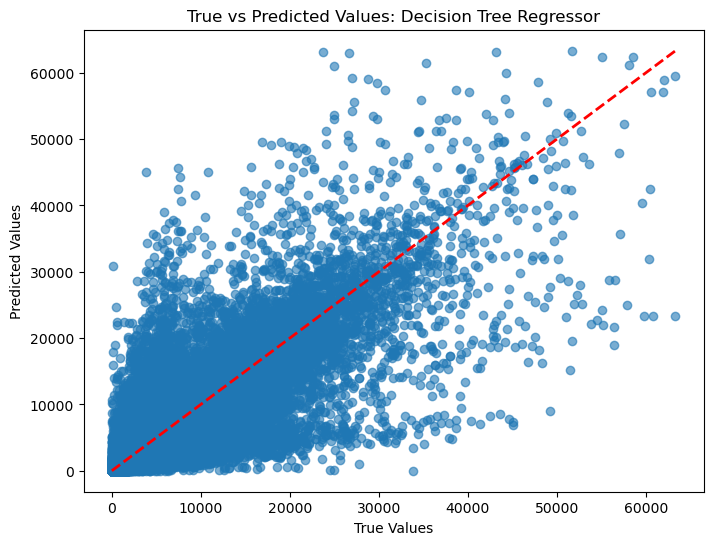

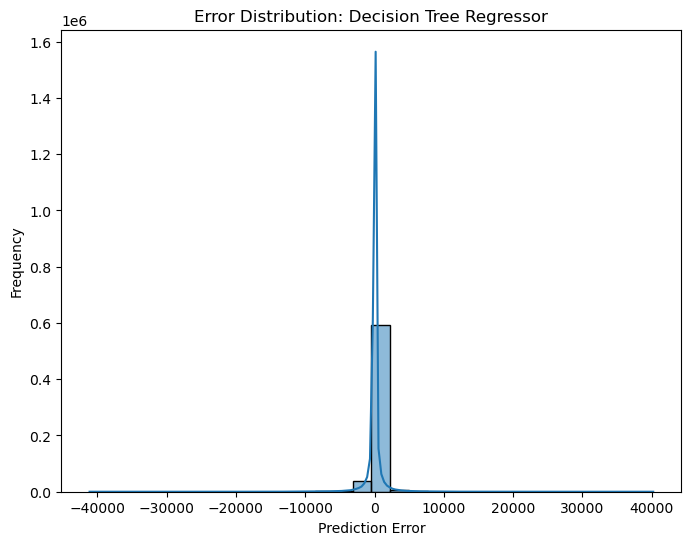

"plot_true_vs_predicted(y_test, rf_preds, 'Random Forest Regressor')\nplot_error_distribution(y_test, rf_preds, 'Random Forest Regressor')"

In [17]:
# Function to plot true vs predicted values
def plot_true_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'True vs Predicted Values: {model_name}')
    plt.show()

# Function to plot error distribution
def plot_error_distribution(y_true, y_pred, model_name):
    errors = y_true - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(errors, kde=True, bins=30)
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.title(f'Error Distribution: {model_name}')
    plt.show()

# Plot for Linear Regression
plot_true_vs_predicted(y_test, lr_preds, 'Linear Regression')
plot_error_distribution(y_test, lr_preds, 'Linear Regression')

# Plot for Decision Tree Regressor
plot_true_vs_predicted(y_test, dt_preds, 'Decision Tree Regressor')
plot_error_distribution(y_test, dt_preds, 'Decision Tree Regressor')

# Plot for Random Forest Regressor
'''plot_true_vs_predicted(y_test, rf_preds, 'Random Forest Regressor')
plot_error_distribution(y_test, rf_preds, 'Random Forest Regressor')'''

In [18]:
from sklearn.metrics import explained_variance_score
import numpy as np

# Calculate additional metrics
# Linear Regression
lr_rmse = np.sqrt(lr_mse)
lr_explained_variance = explained_variance_score(y_test, lr_preds)

# Decision Tree Regressor
dt_rmse = np.sqrt(dt_mse)
dt_explained_variance = explained_variance_score(y_test, dt_preds)
additional_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree'],
    'RMSE': [lr_rmse, dt_rmse, ],
    'Explained Variance': [lr_explained_variance, dt_explained_variance, ]
})
print(additional_results)

               Model         RMSE  Explained Variance
0  Linear Regression  2538.514621            0.054263
1      Decision Tree  1179.509157            0.795824


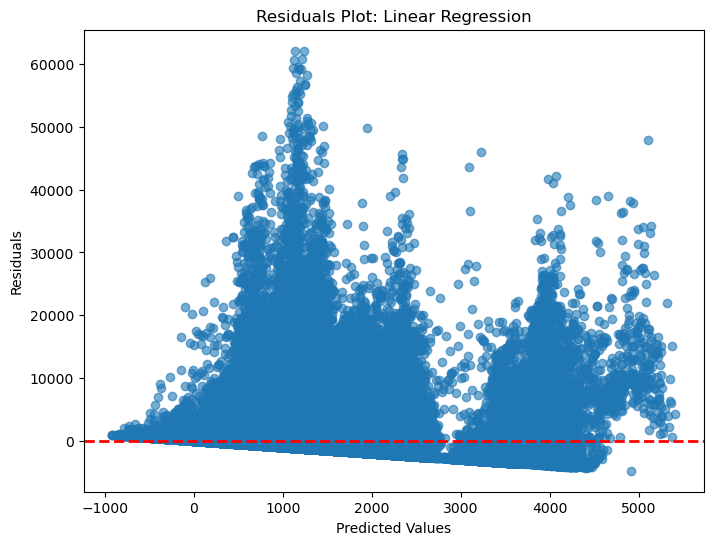

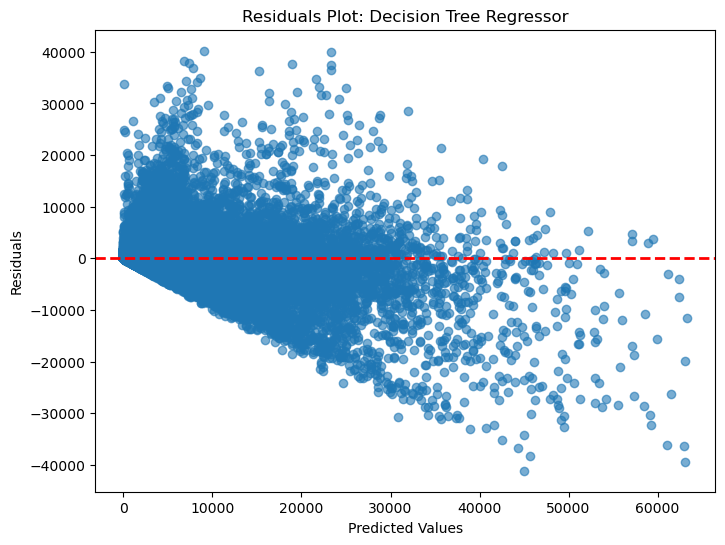

In [19]:
# Function to plot residuals
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(0, color='r', linestyle='--', linewidth=2)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot: {model_name}')
    plt.show()

# Residual plots for each model
plot_residuals(y_test, lr_preds, 'Linear Regression')
plot_residuals(y_test, dt_preds, 'Decision Tree Regressor')


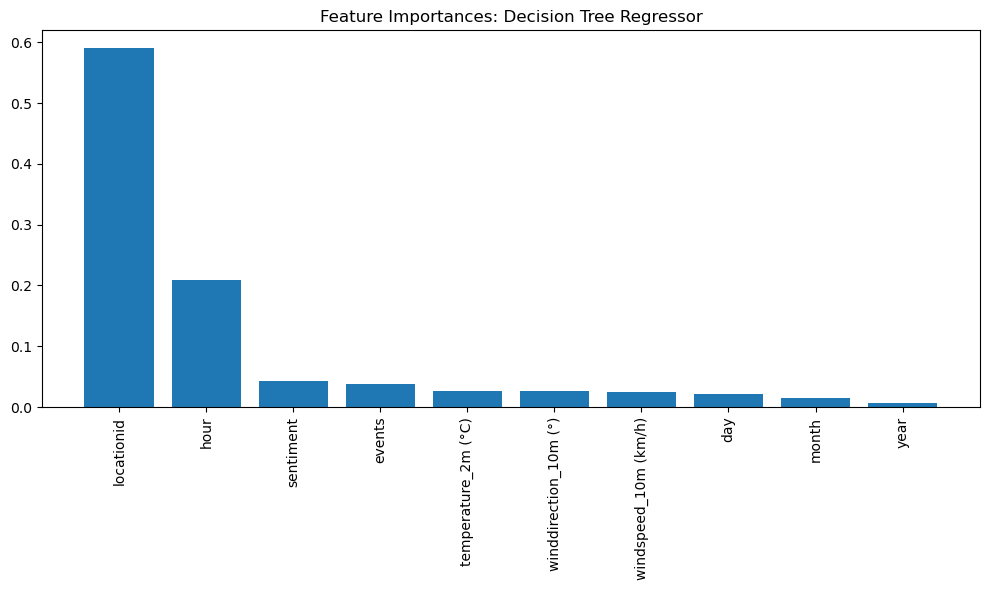

In [20]:
# Plot feature importances for Decision Tree Regressor
def plot_feature_importances(model, model_name, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances: {model_name}')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Plot feature importances for Decision Tree and Random Forest
plot_feature_importances(dt_model, 'Decision Tree Regressor', X.columns)